### The Chaotic Pendulum

Consider a simple pendulum which is driven by an external harmonic force, such that the equation of motion for the pendulum is 
of the form

$$
\frac{d^2\theta}{dt^2} = -\left(\frac{g}{l}\right) \sin\theta - q \frac{d\theta}{dt} + F_D \sin(\omega_D t)
$$

There are *three* natural time scales to choose from (which are those?). Let us choose the natural time period 
of the pendulum (in absence of a driving force) as the natural time-scale, $T_0 = 2\pi\sqrt{l/g}$. Define $\tau$ as time measured in units of $T_0$. Then, the equation of motion reduces to 

$$
\frac{d^2\theta}{d\tau^2} = -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
$$

where $b = q T_0$, $A = F_D T_0^2$ and $\kappa = \omega_D T_0 = 2\pi (T_0/T_D)$. The equation of motion can be expressed as a system of coupled first order differential equations

$$
\begin{align}
\frac{d\theta}{dt} &= v \\
\frac{dv}{dt} &= -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
\end{align}
$$

We can write this system as follows

$$
\begin{align}
\frac{d\theta}{d\tau} &= f(\theta, v, \tau) \\
\frac{dv}{d\tau} &= g(\theta, v, \tau)
\end{align}
$$

where 

$$
\begin{align}
f(\theta, v, \tau) &= v \\
g(\theta, v, \tau) &= -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
\end{align}
$$

This system can be solved using the following RK4 algorithm

$$
\begin{align}
k1 &= \Delta\tau \ f(\theta(\tau), v(\tau), \tau) \\
q1 &= \Delta\tau \ g(\theta(\tau), v(\tau), \tau) \\
k2 &= \Delta\tau \ f(\theta(\tau) + 0.5 \ k1, v(\tau) + 0.5 \ q1, \tau + 0.5 \ \Delta\tau) \\
q2 &= \Delta\tau \ g(\theta(\tau) + 0.5 \ k1, v(\tau) + 0.5 \ q1, \tau + 0.5 \ \Delta\tau) \\
k3 &= \Delta\tau \ f(\theta(\tau) + 0.5 \ k2, v(\tau) + 0.5 \ q2, \tau + 0.5 \ \Delta\tau) \\
q3 &= \Delta\tau \ g(\theta(\tau) + 0.5 \ k2, v(\tau) + 0.5 \ q2, \tau + 0.5 \ \Delta\tau) \\
k4 &= \Delta\tau \ f(\theta(\tau) +  k3, v(\tau) + q3, \tau + \Delta\tau) \\
q4 &= \Delta\tau \ g(\theta(\tau) + k3, v(\tau) + q3, \tau + \Delta\tau) \\
\theta(\tau + \Delta\tau) &= \theta(\tau) + \frac{1}{6}(k1 + 2 \ k2 + 2 \ k3 + k4) \\
v(\tau + \Delta\tau) &= v(\tau) + \frac{1}{6}(q1 + 2 \ q2 + 2 \ q3 + q4)
\end{align}
$$

This is a very rich system, with diverse behaviour which varies with variation in damping force, amplitude of the driving force, 
the driving frequency, etc. We dive into this system systematically, controlling one variable at a time, while keeping others fixed. For definiteness, start with the amplitude of the external force zero, such that the system is simply a dampled pendulum. Start the motion with a small amplitude and zero velocity, and observe the behaviour for different values of the (dimensionless) damping constant. Once you are sure you get the expected behaviour, include the external driving force. This is where you will need to be really careful. For starters,  choose the following values of the parameters: $F_D = 0.5, q > 0.5, \omega_D = 2/3, T_0 = 2\pi$. Observe the behaviour of the system for varying values of the damping term. In particular, observe the phase plots for different initial conditions and observe what happens. 

<html>
<title>HI there </title>
</html>

# Exploring the behaviour 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
def f(theta , v,t):
    return v
def g(theta , v , t ,b,K,A):
    ''' b is the damping term
        K is the frequency term for for driving force
        A is the magnitude of driving force.'''
    return -4*(np.pi**2)*theta -b*v+A*(np.sin(K*t))

In [2]:
# Write your code here
'''x0 and y0 here are the intial conditions 
and t0 to t_n is the time, n are number of iterations'''
'''
  This RK is for pendulum, driving, damping system.
  '''
def RK4_d2(x0,y0,t0,t_n,  B,K,A): 
  h = 10**(-3)
  n = int((t_n-t0)/h)
  x=[x0] # creating lists to append the values into
  y=[y0]
  t=[t0]

  for i in range(0,n):
    k1 = h * f(x0,y0,t0) # here we are defining the slopes
    l1 = h * g(x0,y0,t0,B,K,A)
    k2 = h * f(x0+(k1/2), (y0+l1/2), (t0+h/2))
    l2 = h * g(x0+(k1/2), (y0+l1/2), (t0+h/2),  B ,K ,A )
    k3 = h * f(x0+(k2/2), (y0+l2/2), (t0+h/2))     
    l3 = h * g(x0+(k2/2), (y0+l2/2), (t0+h/2),  B ,K ,A )
    k4 = h * f(x0+k3,y0+l3,t0+h)
    l4 = h * g(x0+k3,y0+l3,t0+h,B,K,A)
    
    x0+= (1/6)*(k1 + 2*k2 + 2*k3 + k4) #defining the new variables here
    y0+= (1/6)*(l1 + 2*l2 + 2*l3 + l4 )
    t0+=h
    
    x.append(x0) #appending them into the list
    y.append(y0)
    t.append(t0)
    
  return x,y,t

Text(0.5, 0, 'time')

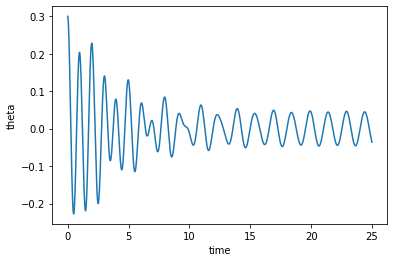

In [4]:
# this is a simulation with small angle approxmation.
theta = .3
vel_in = 0 
tau_in = 0
tau_f = 25
b = .5 # damping
k = 4*(np.pi)/3 # driving frequency 
A = 1 # drivng force
thetas ,vels , time = RK4_d2(theta,vel_in,tau_in,tau_f, b,k,A)
plt.plot(time,thetas)
plt.ylabel("theta")
plt.xlabel("time")

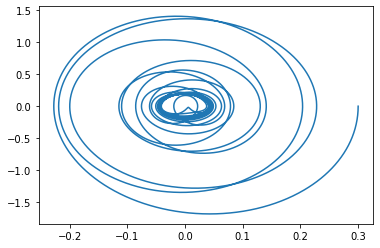

In [5]:
plt.plot(thetas,vels)

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
# these are functions without sin(theta approx.)
def f(theta , v,t):
    return v
def g(theta , v , t ,b,K,A):
    ''' b is the damping term
        K is the frequency term for for driving force
        A is the magnitude of driving force.'''
    return -4*(np.pi**2)*np.sin(theta) -b*v+A*(np.sin(K*t))

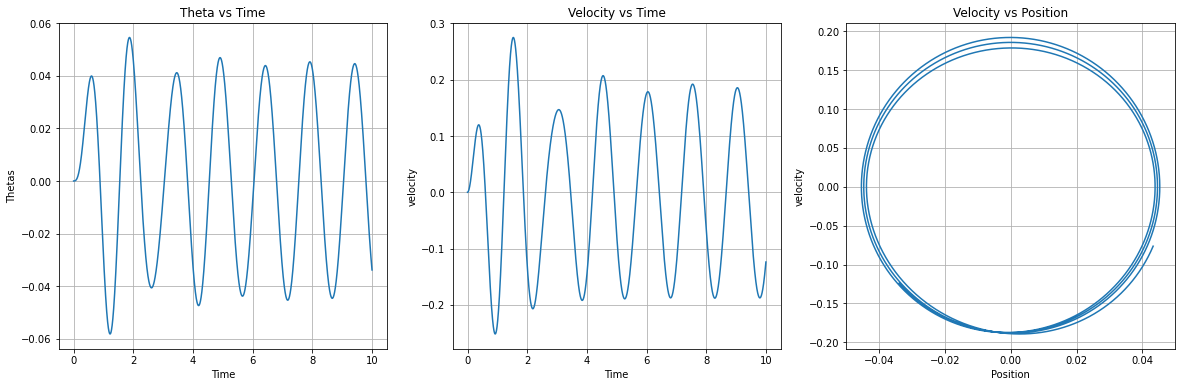

In [7]:
# this is a simulation with small angle approxmation.
theta_sn = 0
vel_in_sn = 0
tau_in_sn = 0
tau_f_sn = 10
k_sn = 4*(np.pi)/3
b_sn = 1
A_sn = 1
thetas_sn ,vels_sn , time_sn= RK4_d2(theta_sn,vel_in_sn,tau_in_sn,tau_f_sn, b_sn,k_sn,A_sn)

plt.figure(figsize=(20,6)) 
plt.subplot(1,3,1)
plt.plot(time_sn,thetas_sn)
plt.grid()
plt.xlabel("Time") ; plt.ylabel("Thetas") ; plt.title("Theta vs Time")

plt.subplot(1,3,2)
plt.plot(time_sn,vels_sn)
plt.grid()
plt.xlabel("Time") ; plt.ylabel("velocity") ; plt.title("Velocity vs Time")

plt.subplot(1,3,3)
plt.plot(thetas_sn[len(thetas_sn)//2 :],vels_sn[len(thetas_sn)//2 :])
plt.grid()
plt.xlabel("Position") ; plt.ylabel("velocity") ; plt.title("Velocity vs Position")

plt.show()

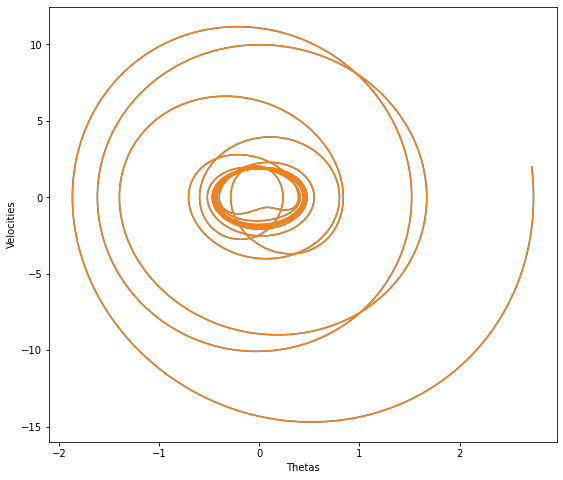

In [3]:
theta_list = [2.7185,2.7187]
plotting_thetas_lists=[]
plotting_vels_lists=[]
plotting_times_lists=[]
#theta_list=[0,2,4,6,8,10,12,14,16,18,20]
vel_in_sn = 2
tau_in_sn =0
tau_f_sn = 100
k_sn = 4*(np.pi)/3
'''
 These are intial where we see the two thetas going to different attractors 
 inspite of being so close.
        theta_list = [2.7185,2.7187]
        vel_in_sn = 2 
        b_sn = .8
        A_sn = 10'''
b_sn = .8
A_sn = 10
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for i in theta_list:
        thetas_list ,vels_list , time_list = RK4_d2(i,vel_in_sn,tau_in_sn,tau_f_sn, b_sn,k_sn,A_sn)

        plotting_thetas_lists.insert(theta_list.index(i),thetas_list)
        plotting_vels_lists.insert(theta_list.index(i),  vels_list)
        plotting_times_lists.insert(theta_list.index(i), time_list)
        plt.plot(thetas_list,vels_list)
#         plt.plot(thetas_list[len(thetas_list)//2:],vels_list[len(thetas_list)//2:])
        plt.xlabel("Thetas"); plt.ylabel("Velocities")
plt.show()

# POINCARE SECTION


In [11]:
def poincare(x0,y0,t0,t_n,  B,K,A): 
  import numpy as np
  h = 10**(-3)
  n = int((t_n-t0)/h) 
  divison = 2
  t_c = (t_n - t0 /(divison))

  N = (int(2/3)*t_c)+1

  x=[x0] # creating lists to append the values into
  y=[y0]
  t=[t0]
  for i in range( n//divison , n):
    
    if x0 <= -1*(np.pi):
      x0 += 2*np.pi

    elif x0 >= np.pi :
      x0 -= 2*np.pi 
    
    else:
      pass
      
    k1 = h * f(x0,y0,t0) # here we are defining the slopes
    l1 = h * g(x0,y0,t0,B,K,A)
    k2 = h * f(x0+(k1/2), (y0+l1/2), (t0+h/2))
    l2 = h * g(x0+(k1/2), (y0+l1/2), (t0+h/2),  B ,K ,A )
    k3 = h * f(x0+(k2/2), (y0+l2/2), (t0+h/2))     
    l3 = h * g(x0+(k2/2), (y0+l2/2), (t0+h/2),  B ,K ,A )
    k4 = h * f(x0+k3,y0+l3,t0+h)
    l4 = h * g(x0+k3,y0+l3,t0+h,B,K,A)
    
    x0 += (1/6)*(k1 + 2*k2 + 2*k3 + k4) #defining the new variables here
    y0 += (1/6)*(l1 + 2*l2 + 2*l3 + l4 )
    t0 += h

    if abs(t0 - (3/2)*N) < h/2: 
      x.append(x0) #appending them into the list
      y.append(y0)
      t.append(t0)
      N+=1
  return x,y,t

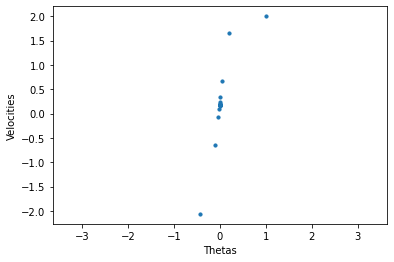

In [13]:
theta_pn = 1
vel_in_pn = 2
tau_in_pn = 0
tau_f_pn = 100
k_pn = 4*(np.pi)/3
b_pn = .8
#A_pn = [18.35**(1)]
A_pn = [1] 
for i in A_pn:
    theta_l_pn ,vl_pn , tl_pn = poincare(theta_pn,vel_in_pn,tau_in_pn,tau_f_pn, b_pn,k_sn,i)
    plt.scatter(theta_l_pn,vl_pn,s = 10)
    plt.xlim(-np.pi - .5  ,np.pi+ .5)
    plt.xlabel("Thetas")
    plt.ylabel("Velocities")
    